Elbow Method
============

The ``KElbowVisualizer`` implements the "elbow" method to help data scientists select the optimal number of clusters by fitting the model with a range of values for :math:`K`. If the line chart resembles an arm, then the "elbow" (the point of inflection on the curve) is a good indication that the underlying model fits best at that point. In the visualizer "elbow" will be annotated with a dashed line.

To demonstrate, in the following example the ``KElbowVisualizer`` fits the ``KMeans`` model for a range of `K` values from 4 to 11 on a sample two-dimensional dataset with 8 random clusters of points. When the model is fit with 8 clusters, we can see a line annotating the "elbow" in the graph, which in this case we know to be the optimal number.


In [80]:
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

!pip install -U yellowbrick

from yellowbrick.cluster import KElbowVisualizer
import warnings
warnings.filterwarnings('ignore')


Requirement already up-to-date: yellowbrick in /usr/local/lib/python3.7/dist-packages (1.3.post1)


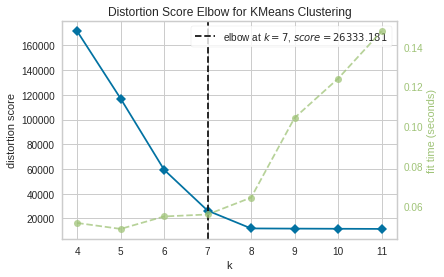

In [81]:

# Generate synthetic dataset with 8 random clusters
X, y = make_blobs(n_samples=1000, n_features=12, centers=8, random_state=42)

# Instantiate the clustering model and visualizer
model = KMeans()
visualizer = KElbowVisualizer(model, k=(4,12))

visualizer.fit(X)        # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure

By default, the scoring parameter ``metric`` is set to ``distortion``, which
computes the sum of squared distances from each point to its assigned center.
However, two other metrics can also be used with the ``KElbowVisualizer`` -- ``silhouette`` and ``calinski_harabasz``. The ``silhouette`` score calculates the mean Silhouette Coefficient of all samples, while the ``calinski_harabasz`` score computes the ratio of dispersion between and within clusters.

The ``KElbowVisualizer`` also displays the amount of time to train the clustering model per :math:`K` as a dashed green line, but is can be hidden by setting ``timings=False``. In the following example, we'll use the ``calinski_harabasz`` score and hide the time to fit the model.

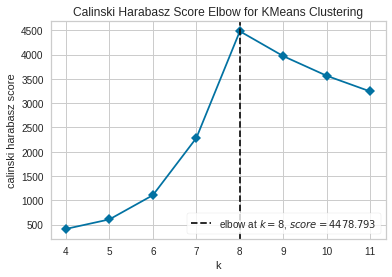

In [82]:
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

from yellowbrick.cluster import KElbowVisualizer

# Generate synthetic dataset with 8 random clusters
X, y = make_blobs(n_samples=1000, n_features=12, centers=8, random_state=42)

# Instantiate the clustering model and visualizer
model = KMeans()
visualizer = KElbowVisualizer(
    model, k=(4,12), metric='calinski_harabasz', timings=False
)
visualizer.fit(X)        # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure

It is important to remember that the "elbow" method does not work well if the data
is not very clustered. In this case, you might see a smooth curve and the optimal value of :math:`K` will be unclear.

Quick Method
------------

The same functionality above can be achieved with the associated quick method ``kelbow_visualizer``. This method will build the ``KElbowVisualizer`` object with the associated arguments, fit it, then (optionally) immediately show the visualization.


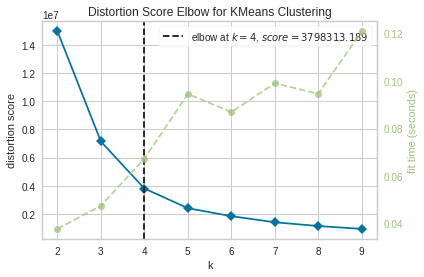

KElbowVisualizer(ax=<matplotlib.axes._subplots.AxesSubplot object at 0x7fcd3f0f25d0>,
                 estimator=KMeans(algorithm='auto', copy_x=True,
                                  init='k-means++', max_iter=300, n_clusters=9,
                                  n_init=10, n_jobs=None,
                                  precompute_distances='auto', random_state=4,
                                  tol=0.0001, verbose=0),
                 k=None, locate_elbow=True, metric='distortion', timings=True)

In [83]:
    from sklearn.cluster import KMeans
    from yellowbrick.cluster.elbow import kelbow_visualizer
    from yellowbrick.datasets.loaders import load_nfl

    X, y = load_nfl()

    # Use the quick method and immediately show the figure
    kelbow_visualizer(KMeans(random_state=4), X, k=(2,10))


Silhouette Visualizer
=====================

The Silhouette Coefficient is used when the ground-truth about the dataset is unknown and computes the density of clusters computed by the model. The score is computed by averaging the silhouette coefficient for each sample, computed as the difference between the average intra-cluster distance and the mean nearest-cluster distance for each sample, normalized by the maximum value. This produces a score between 1 and -1, where 1 is highly dense clusters and -1 is completely incorrect clustering.

The Silhouette Visualizer displays the silhouette coefficient for each sample on a per-cluster basis, visualizing which clusters are dense and which are not. This is particularly useful for determining cluster imbalance, or for selecting a value for :math:`K` by comparing multiple visualizers.

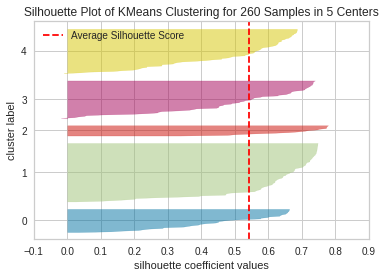

In [84]:
    from sklearn.cluster import KMeans

    from yellowbrick.cluster import SilhouetteVisualizer
    from yellowbrick.datasets import load_nfl

    # Load a clustering dataset
    X, y = load_nfl()

    # Specify the features to use for clustering
    features = ['Rec', 'Yds', 'TD', 'Fmb', 'Ctch_Rate']
    X = X.query('Tgt >= 20')[features]

    # Instantiate the clustering model and visualizer
    model = KMeans(5, random_state=42)
    visualizer = SilhouetteVisualizer(model, colors='yellowbrick')

    visualizer.fit(X)        # Fit the data to the visualizer
    visualizer.show()        # Finalize and render the figure

Quick Method
------------

The same functionality above can be achieved with the associated quick method `silhouette_visualizer`. This method will build the Silhouette Visualizer object with the associated arguments, fit it, then (optionally) immediately show it.


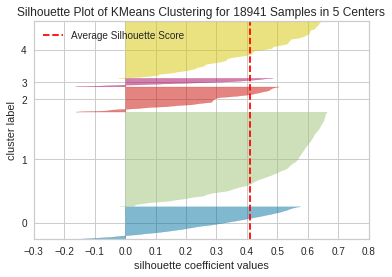

SilhouetteVisualizer(ax=<matplotlib.axes._subplots.AxesSubplot object at 0x7fcd3f0a7210>,
                     colors='yellowbrick',
                     estimator=KMeans(algorithm='auto', copy_x=True,
                                      init='k-means++', max_iter=300,
                                      n_clusters=5, n_init=10, n_jobs=None,
                                      precompute_distances='auto',
                                      random_state=42, tol=0.0001, verbose=0),
                     is_fitted='auto')

In [85]:
    from sklearn.cluster import KMeans

    from yellowbrick.cluster import silhouette_visualizer
    from yellowbrick.datasets import load_credit

    # Load a clustering dataset
    X, y = load_credit()

    # Specify rows to cluster: under 40 y/o and have either graduate or university education
    X = X[(X['age'] <= 40) & (X['edu'].isin([1,2]))]

    # Use the quick method and immediately show the figure
    silhouette_visualizer(KMeans(5, random_state=42), X, colors='yellowbrick')

Intercluster Distance Maps
==========================

Intercluster distance maps display an embedding of the cluster centers in 2 dimensions with the distance to other centers preserved. E.g. the closer to centers are in the visualization, the closer they are in the original feature space. The clusters are sized according to a scoring metric. By default, they are sized by membership, e.g. the number of instances that belong to each center. This gives a sense of the relative importance of clusters. Note however, that because two clusters overlap in the 2D space, it does not imply that they overlap in the original feature space.


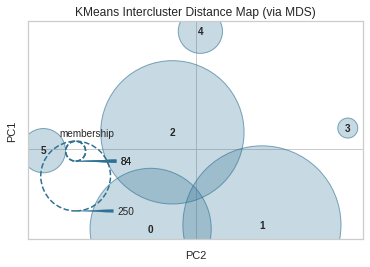

In [86]:
    from sklearn.cluster import KMeans
    from sklearn.datasets import make_blobs

    from yellowbrick.cluster import InterclusterDistance

    # Generate synthetic dataset with 12 random clusters
    X, y = make_blobs(n_samples=1000, n_features=12, centers=12, random_state=42)

    # Instantiate the clustering model and visualizer
    model = KMeans(6)
    visualizer = InterclusterDistance(model)

    visualizer.fit(X)        # Fit the data to the visualizer
    visualizer.show()        # Finalize and render the figure

Quick Method
------------

The same functionality above can be achieved with the associated quick method `intercluster_distance`. This method will build the ``InterclusterDistance`` object with the associated arguments, fit it, then (optionally) immediately show it.


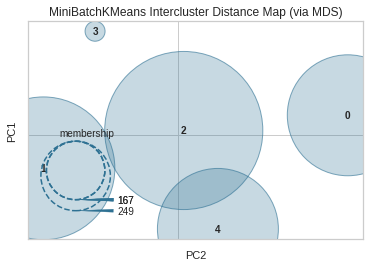

InterclusterDistance(ax=<matplotlib.axes._subplots.AxesSubplot object at 0x7fcd3eca7a50>,
                     embedding='mds',
                     estimator=MiniBatchKMeans(batch_size=100,
                                               compute_labels=True,
                                               init='k-means++', init_size=None,
                                               max_iter=100,
                                               max_no_improvement=10,
                                               n_clusters=5, n_init=3,
                                               random_state=777,
                                               reassignment_ratio=0.01, tol=0.0,
                                               verbose=0),
                     is_fitted='auto', legend=True, legend_loc='lower left',
                     legend_size=1.5, max_size=25000, min_size=400,
                     random_state=None, scoring='membership')

In [87]:
    from yellowbrick.datasets import load_nfl
    from sklearn.cluster import MiniBatchKMeans
    from yellowbrick.cluster import intercluster_distance


    # Generate synthetic dataset with 12 random clusters
    X, y = make_blobs(n_samples=1000, n_features=12, centers=12, random_state=42)
    
    intercluster_distance(MiniBatchKMeans(5, random_state=777), X)

# Correlation Matrix Clustering example

## Function to plot the correlation matrix of a dataframe.

In [88]:
def plot_corr(df,size=10):
    '''Plot a graphical correlation matrix for a dataframe.

    Input:
        df: pandas DataFrame
        size: vertical and horizontal size of the plot'''
    
    %matplotlib inline
    import matplotlib.pyplot as plt

    # Compute the correlation matrix for the received dataframe
    corr = df.corr()
    
    # Plot the correlation matrix
    fig, ax = plt.subplots(figsize=(size, size))
    cax = ax.matshow(corr, cmap='RdYlGn')
    plt.xticks(range(len(corr.columns)), corr.columns, rotation=90);
    plt.yticks(range(len(corr.columns)), corr.columns);
    
    # Add the colorbar legend
    cbar = fig.colorbar(cax, ticks=[-1, 0, 1], aspect=40, shrink=.8)

## Generate example data

In [89]:
import pandas as pd
import numpy as np

# Generate 50 variables with 1000 samples
n_variables = 50
n_samples = 1000

# Those variables will be spread over 3 clusters of variable sizes
cluster_size = [5,22,28]
n_clusters = len(cluster_size)

# Assign each variable to a cluster
belongs_to_cluster = [i for i, c in enumerate(cluster_size) for n in range(c)]
np.random.shuffle(belongs_to_cluster)

# This latent data is used to make variables that belong
# to the same cluster correlated.
latent = np.random.randn(n_clusters, n_samples)

variables = []
for i in range(n_variables):
    variables.append(np.random.randn(n_samples) + latent[belongs_to_cluster[i], :])

df = pd.DataFrame(np.array(variables).transpose())

## Visualize the correlation matrix

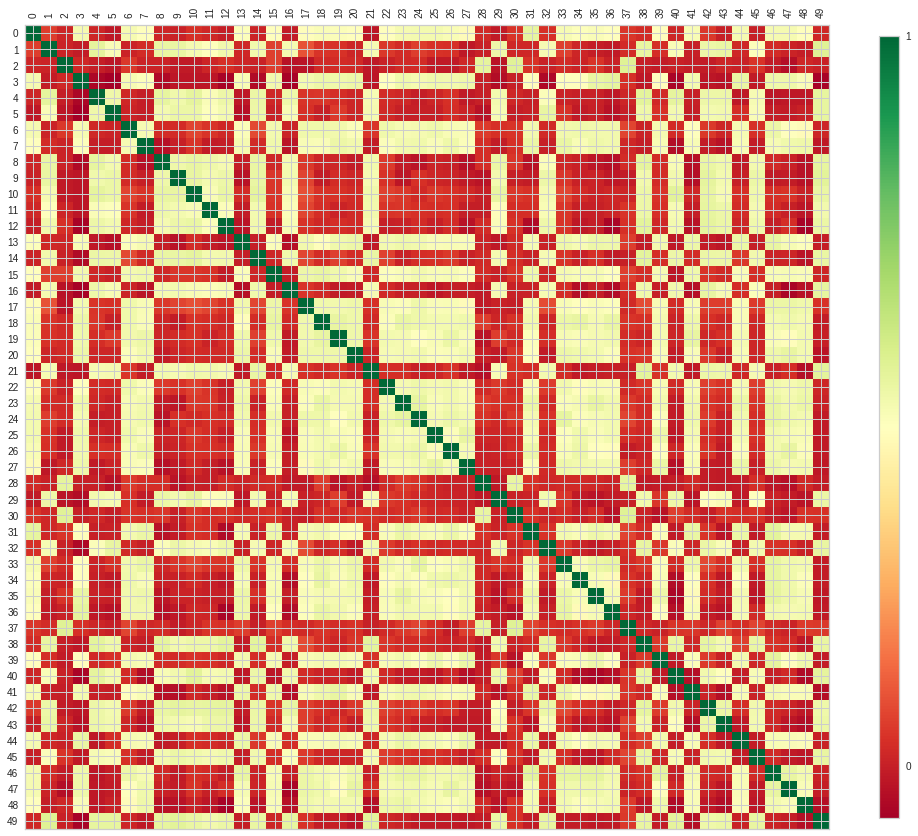

In [90]:
plot_corr(df, size=18)

## Cluster the correlation matrix and visualize it
We use hierarchical clustering to determine which columns belongs to which cluster.

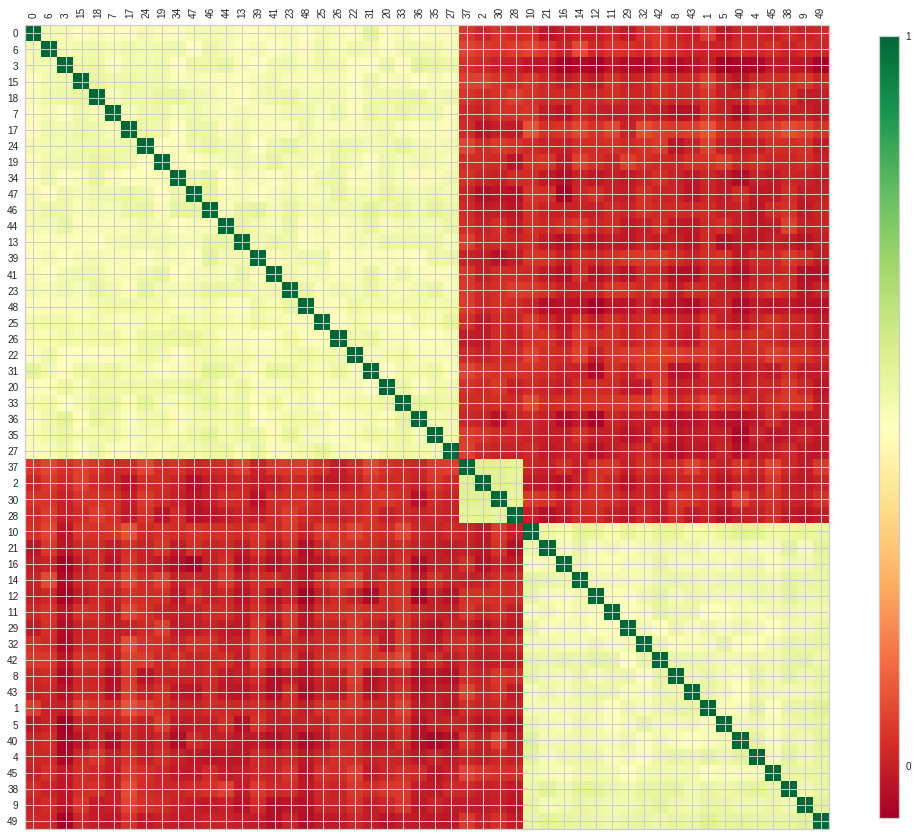

In [93]:
import scipy
import scipy.cluster.hierarchy as sch

X = df.corr().values
d = sch.distance.pdist(X)   # vector of ('55' choose 2) pairwise distances
L = sch.linkage(d, method='complete')
ind = sch.fcluster(L, n_clusters, 'maxclust')
columns = [df.columns.tolist()[i] for i in list((np.argsort(ind)))]
df = df.reindex(columns, axis=1)

plot_corr(df, size=18)

In [92]:
ind

array([1, 3, 2, 1, 3, 3, 1, 1, 3, 3, 3, 3, 3, 1, 3, 1, 3, 1, 1, 1, 1, 3,
       1, 1, 1, 1, 1, 1, 2, 3, 2, 1, 3, 1, 1, 1, 1, 2, 3, 1, 3, 1, 3, 3,
       1, 3, 1, 1, 1, 3], dtype=int32)

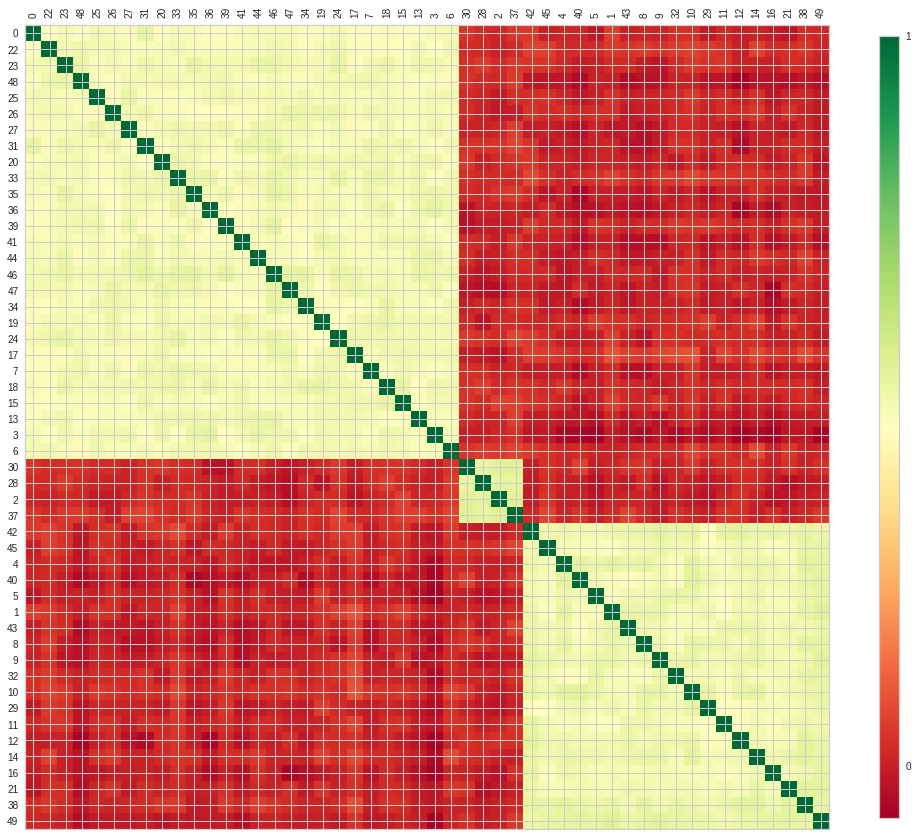

In [91]:
import scipy
import scipy.cluster.hierarchy as sch

X = df.corr().values
d = sch.distance.pdist(X)   # vector of ('55' choose 2) pairwise distances
L = sch.linkage(d, method='complete')
ind = sch.fcluster(L, 0.5*d.max(), 'distance')
columns = [df.columns.tolist()[i] for i in list((np.argsort(ind)))]
df = df.reindex(columns, axis=1)

plot_corr(df, size=18)

## Do a two-pass clustering on the biggest clusters
In the first pass we do as earlier, then for bigger clusters we re-cluster them individually. We could easily extend this to an n-pass clustering until all sub-clusters are smaller than a threshold.

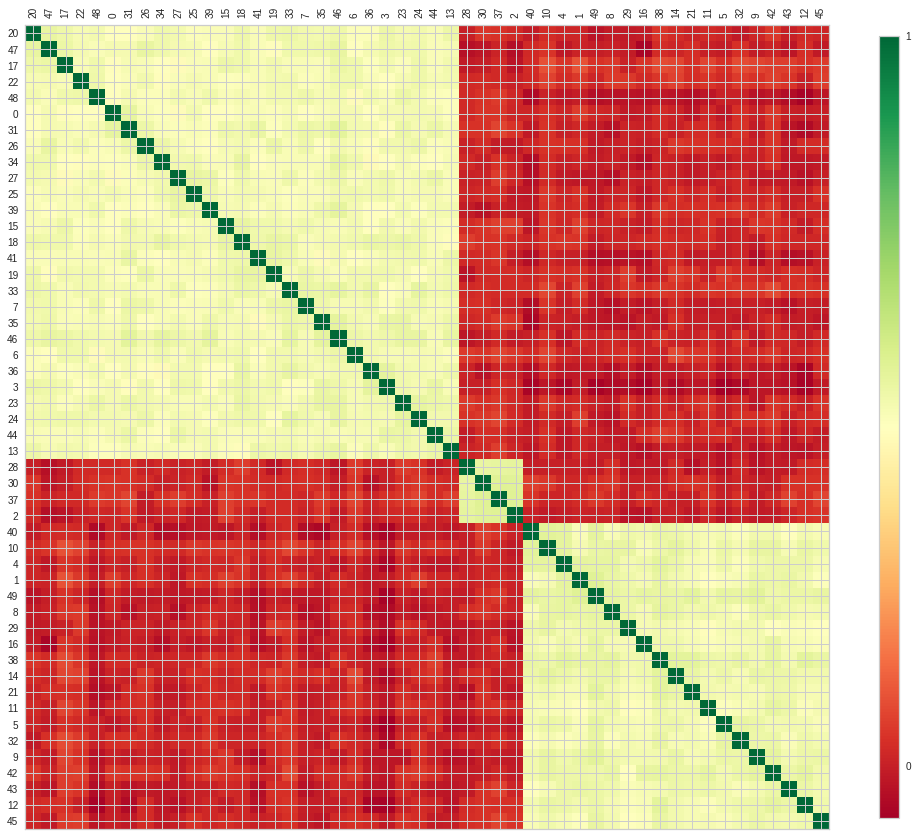

In [94]:
# Two pass clustering
# 1-We cluster the corr matrix
#   We sort the survey data according to this clustering
# 2-For cluster bigger than a threshold we cluster those sub-clusters
#   We sort the survey data according to these clustering

import scipy
import scipy.cluster.hierarchy as sch

cluster_th = 4

X = df.corr().values
d = sch.distance.pdist(X)
L = sch.linkage(d, method='complete')
ind = sch.fcluster(L, 0.5*d.max(), 'distance')

columns = [df.columns.tolist()[i] for i in list(np.argsort(ind))]
df = df.reindex(columns, axis=1)

unique, counts = np.unique(ind, return_counts=True)
counts = dict(zip(unique, counts))

i = 0
j = 0
columns = []
for cluster_l1 in set(sorted(ind)):
    j += counts[cluster_l1]
    sub = df[df.columns.values[i:j]]
    if counts[cluster_l1]>cluster_th:        
        X = sub.corr().values
        d = sch.distance.pdist(X)
        L = sch.linkage(d, method='complete')
        ind = sch.fcluster(L, 0.5*d.max(), 'distance')
        col = [sub.columns.tolist()[i] for i in list((np.argsort(ind)))]
        sub = sub.reindex(col, axis=1)
    cols = sub.columns.tolist()
    columns.extend(cols)
    i = j
df = df.reindex(columns, axis=1)

plot_corr(df, 18)